# <center>Analyse des sentiments


**Projet tutoré présenté par:**
    
<center> Soukina KADIM
<center> Mohamed EZ-ZAALYOUY
<center> Abdelmalek EL MOUKHTAR

**==> Ce à quoi vous devez vous attendre en tant qu'hôte Airbnb à Berlin:**
- Airbnb a réussi à perturber le secteur traditionnel de l'hôtellerie, car de plus en plus de voyageurs décident d'utiliser Airbnb comme principal fournisseur d'hébergement. Depuis sa création en 2008, Airbnb a connu une croissance énorme, le nombre de locations répertoriées sur son site Web augmentant de façon exponentielle chaque année.

- En Allemagne, aucune ville n'est plus populaire que Berlin. Cela implique que Berlin est l'un des marchés les plus chauds pour Airbnb en Europe, avec plus de 22 552 annonces en novembre 2018. Avec une taille de 891 km², cela signifie qu'il y a environ 25 logements loués par km² à Berlin sur Airbnb !

La question suivante sera le moteur de ce projet :

**<center>Qu'est-ce que les visiteurs aiment et n'aiment pas ?**

# Les ensembles de données:

Nous vais utiliser les données d'avis provenant du site Inside Airbnb sur la ville Berlin en Germany. Le jeux de données ont été le 21 October, 2021.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# import necessary libraries
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string

In [4]:
import time
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import nltk

# Obtention et affichage des données

In [66]:
#Lire un fichier de valeurs séparées par des virgules (csv) dans DataFrame.
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [67]:
reviews.isna().sum()
#isna(). sum() ajoute False et True en les remplaçant respectivement par 0 et 1. 
#Par conséquent, cela compte indirectement le NaN , où un simple compte ne ferait que renvoyer la longueur de la colonne.

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         385
dtype: int64

Nous remarquons que 385 des lignes contiennent un commentaire vide, que nous supprimerons à l'étape suivante **reviews.dropna(inplace=True)**.

In [68]:
reviews.dropna(inplace=True)
reviews.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

# listings_DataFrame

In [69]:
# checking shape
print("L'ensemble de données a {}  lignes et {} colonnes.".format(*listings.shape))

# checking duplicates
print("It contains {} duplicates.".format(listings.duplicated().sum()))

L'ensemble de données a 17499  lignes et 74 colonnes.
It contains 0 duplicates.


- Nous allons travailler en **istings_DataFrame** sur la colonne **review_scores_rating** qui contient un nombre compris entre **0 et 5** .
- Nous effacerons les autres colonnes en utilisant la fonction **drop().**

In [70]:
listings.drop(["listing_url","scrape_id","last_scraped","name","description","neighborhood_overview","picture_url",
               "host_id","host_url","review_scores_communication","review_scores_location","review_scores_value",
               "license","instant_bookable","calculated_host_listings_count","calculated_host_listings_count_entire_homes",
               "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms","reviews_per_month",
               "host_name","host_since","host_location","host_about","host_response_time","host_response_rate",
               "host_acceptance_rate","host_is_superhost","host_thumbnail_url","calendar_last_scraped","number_of_reviews",
               "number_of_reviews_ltm","number_of_reviews_l30d","first_review","last_review","host_picture_url",
               "host_neighbourhood","host_listings_count","host_total_listings_count","host_verifications",
               "host_has_profile_pic","host_identity_verified","neighbourhood","neighbourhood_cleansed","calendar_updated",
               "has_availability","availability_30","availability_60","availability_90","availability_365",
               "review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","neighbourhood_group_cleansed",
               "latitude","longitude","property_type","room_type","accommodates","bathrooms","bathrooms_text","price",
               "minimum_nights","maximum_nights","minimum_minimum_nights","maximum_minimum_nights","minimum_maximum_nights",
               "maximum_maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm","bedrooms","beds","amenities",
               "listing_url"], axis = 1, inplace = True)

In [71]:
listings.head(3)

,id,review_scores_rating
0,3176,4.63
1,7071,4.83
2,9991,5.00


# reviews_DataFrame

In [72]:
# checking shape
print("L'ensemble de données a {}  lignes et {} colonnes.".format(*reviews.shape))

# checking duplicates
print("It contains {} duplicates.".format(reviews.duplicated().sum()))

L'ensemble de données a 409906  lignes et 6 colonnes.
It contains 0 duplicates.


**Reviews_DataFrame** contient une colonne de **commentaires**, qui est notre ressource importante pour l'analyse des sentiments

In [73]:
reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a..."


In [74]:
#Nous effacerons les autres colonnes en utilisant la fonction drop().
reviews.drop(["id","date","reviewer_id","reviewer_name"], axis = 1, inplace = True)

In [75]:
#Nous avons changé le nom de la colonne listant_id en id, cela nous aide à l'étape suivante.
reviews=reviews.rename(columns={'listing_id': 'id'})

In [76]:
reviews.head(3)

,id,comments
0,3176,"excellent stay, i would highly recommend it. a..."
1,3176,Britta's apartment in Berlin is in a great are...
2,3176,"Fantastic, large place in good location. Only ..."


Il peut être utile d'avoir plus de détails, comme le commentaire est-il positif ou négatif ?, etc.
Pour obtenir ces informations, combinons notre reviews_dataframe avec le listings_dataframe et ne prenons que les colonnes dont nous avons besoin.

In [77]:
# merging full reviews + add only specific columns from listings
data=pd.merge(reviews,listings) 

In [79]:
data.head(3)

,id,comments,review_scores_rating
0,3176,"excellent stay, i would highly recommend it. a...",4.63
1,3176,Britta's apartment in Berlin is in a great are...,4.63
2,3176,"Fantastic, large place in good location. Only ...",4.63


In [80]:
# checking shape
print("L'ensemble de données a {}  lignes et {} colonnes.".format(*data.shape))

L'ensemble de données a 409904  lignes et 3 colonnes.


# Détection de la langue de comments

In [81]:
# import langdetect 
from langdetect import detect

In [25]:
# écrire la fonction qui détecte la langue du comment :
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

Nous ajouterons une nouvelle colonne contenant la langue après avoir découvert la langue de chaque commentaire

In [26]:
%%time
# détecte la langue du chaque commentaire
#data['language'] = data['comments'].apply(language_detection)

Wall time: 1h 19s


In [5]:
# écrivez la trame de données dans un fichier csv afin d'éviter la longue durée d'exécution
# data.to_csv('data_avec_language', index=False)
data = pd.read_csv('data_avec_language')

**value_counts()** avec les fréquences relatives des valeurs uniques. En définissant **normalize=True** , l'objet retourné contiendra les fréquences relatives des valeurs uniques puor chaque language. 

In [6]:
#visualiser les langues des commentaires
data.language.value_counts().head(10)
#en = 'English'
#de = 'German' 
#fr = 'French'

en    253924
de    101815
fr     17123
es     10907
it      4335
nl      4149
ru      3156
ko      1744
da      1638
pt      1366
Name: language, dtype: int64

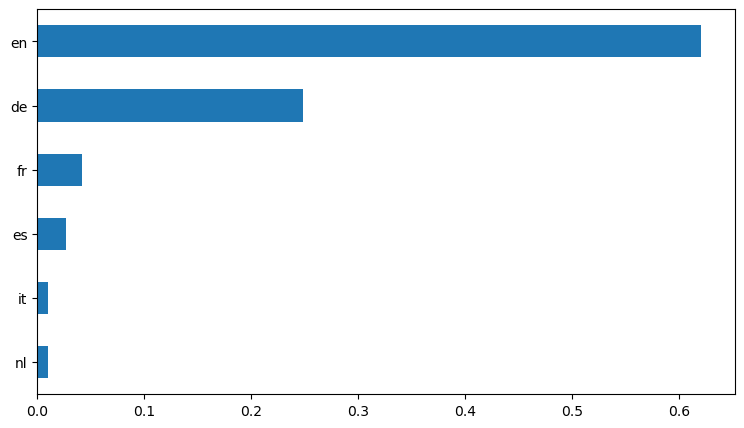

In [7]:
# visualiser les langues des commentaires
data.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));
plt.show()

Nous remarquons sur le graphique ci-dessus que les participants parlent plus anglais

- Nous avons divisé nos dataframes en sous-dataframes liées au langage.
- **Dans les prochaines étapes, nous travaillerons que sur dataframes liées à la langue anglaise**

In [8]:
# diviser notre dataframes en sous-dataframes liés au langage
data_English = data[(data['language']=='en')]
data_German  = data[(data['language']=='de')]
data_French  = data[(data['language']=='fr')]

In [9]:
data_English.head(3)

,id,comments,review_scores_rating,language
0,3176,"excellent stay, i would highly recommend it. a...",4.63,en
1,3176,Britta's apartment in Berlin is in a great are...,4.63,en
2,3176,"Fantastic, large place in good location. Only ...",4.63,en


# Visualiser les données avec WordClouds

Word Cloud est une technique de visualisation de données utilisée pour représenter des données textuelles dans laquelle la taille de chaque mot indique sa fréquence ou son importance. 

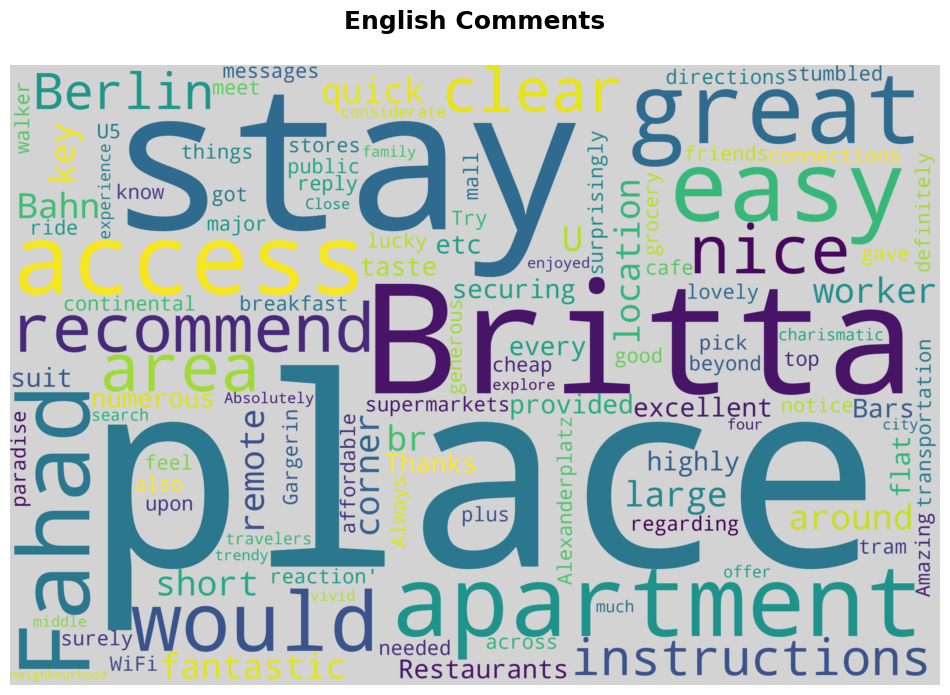

In [10]:
# Visualizing the Data with WordClouds
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(data_English.comments.values))
# plot the WordCloud image 
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off") #
plt.title('English Comments\n', fontsize=18, fontweight='bold')
plt.show()

# Concaténer les commentaire qui ont même "ID"

In [11]:
aggregation_functions = {'comments': 'sum', 'review_scores_rating': 'first'}
dataSet = data_English.groupby(data_English['id']).aggregate(aggregation_functions)

In [12]:
dataSet.head(3)

,comments,review_scores_rating
id,,
3176,"excellent stay, i would highly recommend it. a...",4.63
7071,I could not have asked for a better place to s...,4.83
9991,The host was very welcoming and hospitable. He...,5.00


# Cleaning text

In [13]:
import re
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)    #function converts the specified value into a string.
    sentence = sentence.lower() #converting each uppercase character to lowercase.
    sentence = cleanup_re.sub(' ', sentence).strip() #Supprime tous les espaces ou caractères spécifiés au début et à la fin d'une chaîne.
    return sentence

dataSet['comments'] = dataSet['comments'].apply(cleanup) #appliqueons la fonction "cleanup" à notre DataFrame 

dataSet.head(5)

,comments,review_scores_rating
id,,
3176,excellent stay i would highly recommend it a n...,4.63
7071,i could not have asked for a better place to s...,4.83
9991,the host was very welcoming and hospitable he ...,5.00
14325,we had everything we needed the apartment was ...,4.67
16644,a great apartment in a fantastic area br well ...,4.72


In [14]:
dataSet.index=range(len(dataSet)) #L'index (étiquettes de ligne) du DataFrame.

In [15]:
dataSet.head(4)

,comments,review_scores_rating
0,excellent stay i would highly recommend it a n...,4.63
1,i could not have asked for a better place to s...,4.83
2,the host was very welcoming and hospitable he ...,5.00
3,we had everything we needed the apartment was ...,4.67


Dans ce étaps, nous définissons le type (positive ou negative) pour chaque texte avec une valeur de "review_scores_rating". Si la valeur de "review_scores_rating" est **supérieure à 4**, on dit que le texte est de type **"positive"**, sinon on dit que le texte est de type **"negative"**

In [34]:
cat_positive=[]
cat_negative=[]
for i in range(len(dataSet['comments'])):
    if (dataSet['review_scores_rating'][i] >4.0 ): #
        cat_positive.append([dataSet['comments'][i],"positive"])
    else:
        cat_negative.append([dataSet['comments'][i],"negative"])

In [35]:
lites=cat_positive+cat_negative

In [36]:
import random 
random.shuffle(lites)

In [21]:
import pandas as pd
df=pd.DataFrame(lites)
df.columns=['text','category']


from sklearn.utils import shuffle
data = shuffle(df)
data.head(5)

,text,category
1662,vitaliy is a really great host and provide eve...,positive
11279,well located flat and a friendly host,positive
2940,i stayed at christian s while looking for a ne...,positive
3613,the apartment was beautiful and in a great loc...,positive
7016,alexander s place is amazing much better than ...,positive


In [22]:
len(data[data["category"]=="positive"])

12133

In [23]:
len(data[data["category"]=="negative"])

1074

# Splitting Train and Test Data

In [24]:
train=data.sample(frac=0.8,random_state=100)
test=data.drop(train.index)

# Naive bayes classifier

In [25]:
train["words"] = train["text"].str.lower().str.split()
test["words"] = test["text"].str.lower().str.split()

In [26]:
import nltk
all_words= nltk.FreqDist(w[i] for w in train["words"] for i in range(len(w)))
all_words

FreqDist({'and': 442601, 'the': 440796, 'a': 271006, 'to': 244342, 'is': 207844, 'was': 188869, 'in': 176340, 'very': 157424, 'we': 112302, 'br': 111951, ...})

La première étape de la création d'un classificateur consiste à décider quelles caractéristiques de l'entrée sont pertinentes, et comment coder ces caractéristiques. La fonction d'extraction de caractéristiques suivante construit un dictionnaire contenant des informations pertinentes sur un nom donné :

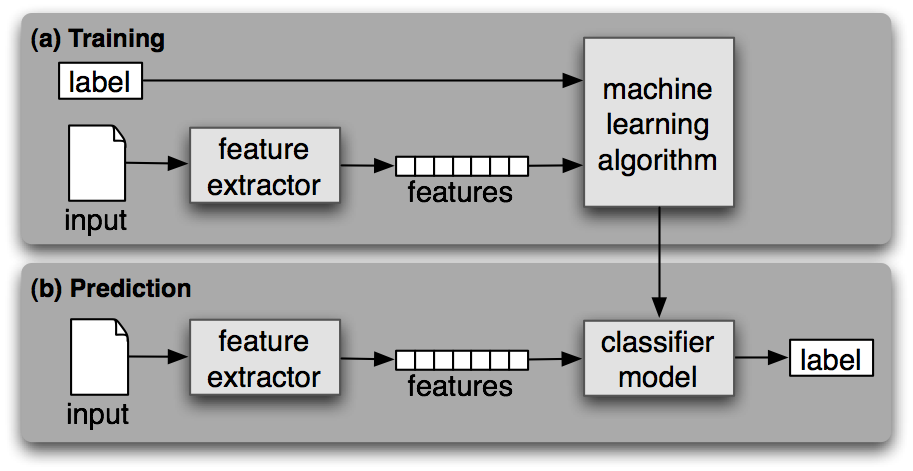

In [27]:
def word_feats(words):
    features = {}
    for word in words:        
        features [word] = True
    return features

Ensuite, nous utilisons l'extracteur de caractéristiques pour traiter les données de mots et divisons la liste résultante d'ensembles de caractéristiques en un ensemble d'apprentissage et un ensemble de test. 

Maintenant que nous avons défini un extracteur de caractéristiques, nous devons préparer une liste de commenter et les étiquettes de classe correspondantes.

In [28]:
train.index = range(train.shape[0])
test.index = range(test.shape[0])


train_naive = []
test_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["category"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["category"][i]]]



L'ensemble d'apprentissage est utilisé pour former un nouveau classificateur "naïf de Bayes".

In [29]:
%%time
classifier = nltk.NaiveBayesClassifier.train(train_naive)

Wall time: 9.78 s


On peut évaluer systématiquement le classifieur sur une quantité beaucoup plus importante de données invisibles :

In [30]:
# Test the classifier
print("Naive bayes Accuracy : {}".format(nltk.classify.accuracy(classifier, test_naive)))

Naive bayes Accuracy : 0.9254070427868232


In [31]:
# Show the most important features as interpreted by Naive Bayes

classifier.show_most_informative_features(5)

Most Informative Features
                   truly = True           positi : negati =     58.4 : 1.0
                   steps = True           positi : negati =     49.7 : 1.0
              functional = True           positi : negati =     47.2 : 1.0
                  beyond = True           positi : negati =     46.4 : 1.0
                   buses = True           positi : negati =     45.5 : 1.0


Cette liste montre que le mot de l'ensemble d'apprentissage **"design"**  sont 50 fois plus souvent positive que negative. 

et aussi  le mot  **"steps"** sont 32 fois plus souvent positive que negative. 

Ces rapports sont connus sous le nom de rapports de vraisemblance et peuvent être utiles pour comparer différentes relations entre caractéristiques et résultats.

In [32]:
classifier.classify(word_feats('perfect')) 

'positive'